In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import CubicSpline, interp1d
from nuclear_matter import setup_rc_params

setup_rc_params()
mpl.rcParams['hatch.linewidth'] = 0.6  # Can't be set while plotting

In [2]:
# sampling points
Esym = np.linspace(25, 35, 301)  # Use many points for interpolating expt region

avail_srcs = []

# HIC
data_HIC_upper = pd.read_csv("./data/HIC_upper.csv",names=['Esym', 'L']) 
data_HIC_lower = pd.read_csv("./data/HIC_lower.csv",names=['Esym', 'L']) 
spline_HIC_upper = CubicSpline(data_HIC_upper["Esym"], data_HIC_upper["L"])
spline_HIC_lower = CubicSpline(data_HIC_lower["Esym"], data_HIC_lower["L"])
avail_srcs.append({
    "label" : "HIC", "facecolor" : "green", 'spline_lower': spline_HIC_lower,
    'spline_upper': spline_HIC_upper, 'Esym': Esym,
    'label_x': 0.8, 'label_y': 0.93, 'ha': 'right', 'va': 'top', 'label_color': 'w'
})

# Sn neutron skin
data_Sn_upper = pd.read_csv("./data/Sn_skin_upper.csv", names=['Esym', 'L']) 
data_Sn_lower = pd.read_csv("./data/Sn_skin_lower.csv", names=['Esym', 'L']) 
spline_Sn_upper = CubicSpline(data_Sn_upper["Esym"], data_Sn_upper["L"])
spline_Sn_lower = CubicSpline(data_Sn_lower["Esym"], data_Sn_lower["L"])
avail_srcs.append({
    "label" : "Sn Neutron Skin", "facecolor" : "cyan", 'spline_lower': spline_Sn_lower,
    'spline_upper': spline_Sn_upper, 'Esym': Esym, 'alpha': 0.8,
    'label_x': 0.67, 'label_y': 0.138, 'ha': 'center', 'va': 'center', 'label_color': 'k',
    'rotation': -38.5
})

# GDR
data_GDR_upper = pd.read_csv("./data/GDR_upper.csv", names=['Esym', 'L']) 
data_GDR_lower = pd.read_csv("./data/GDR_lower.csv", names=['Esym', 'L']) 
spline_GDR_upper = CubicSpline(data_GDR_upper["Esym"], data_GDR_upper["L"])
spline_GDR_lower = CubicSpline(data_GDR_lower["Esym"], data_GDR_lower["L"])
avail_srcs.append({
    "label" : "GDR", "facecolor" : "red", 'spline_lower': spline_GDR_lower,
    'spline_upper': spline_GDR_upper, 'Esym': Esym,
    'label_x': 0.135, 'label_y': 0.02, 'ha': 'left', 'va': 'bottom', 'label_color': 'w'
})

# Pb dipole
data_Pb_upper = pd.read_csv("./data/Pb_dipole_upper.csv", names=['Esym', 'L']) 
data_Pb_lower = pd.read_csv("./data/Pb_dipole_lower.csv", names=['Esym', 'L']) 
spline_Pb_upper = CubicSpline(data_Pb_upper["Esym"], data_Pb_upper["L"])
spline_Pb_lower = CubicSpline(data_Pb_lower["Esym"], data_Pb_lower["L"])
avail_srcs.append({
    "label" : "Pb", "facecolor" : "k", 'spline_lower': spline_Pb_lower,
    'spline_upper': spline_Pb_upper, 'Esym': Esym,
    'hatch': 'xx',
#     'alpha': 0.5,
    'label_x': 0.05, 'label_y': 0.26, 'ha': 'center', 'va': 'center', 'label_color': 'k',
    'bbox': True
})

# IAS
data_IAS = pd.read_csv("./data/IAS.csv",names=['Esym', 'L'])
# The data appears to go around the masses ellipse, but it doesn't in Lattimer 20xx
data_IAS2 = pd.concat((data_IAS[:36], data_IAS[-2:]), ignore_index=True)

# Find the lower and upper parts manually, only used for experimental agreement region
data_IAS_upper = data_IAS2[27:-1].sort_values(by='Esym')
data_IAS_lower = data_IAS2[:27].sort_values(by='Esym')
spline_data_IAS_upper = interp1d(
    data_IAS_upper["Esym"], data_IAS_upper["L"], bounds_error=False, fill_value=np.NaN)
spline_data_IAS_lower = interp1d(
    data_IAS_lower["Esym"], data_IAS_lower["L"], bounds_error=False, fill_value=np.NaN)

avail_srcs.append({
    "label" : "IAS", "facecolor" : "b", 'Esym': data_IAS2['Esym'], 'L': data_IAS2['L'],
    'label_x': 0.88, 'label_y': 0.8, 'ha': 'right', 'va': 'top', 'label_color': 'w',
    'use_spline': False, 'spline_upper': spline_data_IAS_upper,
    'spline_lower': spline_data_IAS_lower
})


# masses
data_masses = pd.read_csv("./data/masses.csv",names=['Esym', 'L'])

# Find the lower and upper parts manually, only used for experimental agreement region
data_masses_upper = data_masses[34:-1].sort_values(by='Esym')
data_masses_lower = data_masses[:34].sort_values(by='Esym')
spline_data_masses_upper = CubicSpline(data_masses_upper["Esym"], data_masses_upper["L"], extrapolate=False)
spline_data_masses_lower = CubicSpline(data_masses_lower["Esym"], data_masses_lower["L"], extrapolate=False)

avail_srcs.append({
    "label" : "Masses", "facecolor" : "orange", 'Esym': data_masses['Esym'], 'L': data_masses['L'],
    'label_x': 0.36, 'label_y': 0.208, 'ha': 'center', 'va': 'center', 'label_color': 'k',
    'rotation': 60, 'use_spline': False, 'spline_upper': spline_data_masses_upper,
    'spline_lower': spline_data_masses_lower
})

# Hebeler
data_H = pd.read_csv("./data/H.csv", names=['Esym', 'L']) 
avail_srcs.append({
    "label" : "H", "facecolor" : "magenta", 'Esym': data_H['Esym'], 'L': data_H['L'],
    'label_x': 0.53, 'label_y': 0.35, 'ha': 'right', 'va': 'top', 'label_color': 'k',
    'use_spline': False,
})

# Gandolfi
data_G = pd.read_csv("./data/G.csv", names=['Esym', 'L']) 
avail_srcs.append({
    "label" : "G", "facecolor" : "0.5", 'Esym': data_G['Esym'], 'L': data_G['L'],
    'label_x': 0.65, 'label_y': 0.4, 'ha': 'right', 'va': 'top', 'label_color': 'k',
    'use_spline': False
})

Make sure that our interpolants correctly split the Masses and IAS into upper and lower parts:

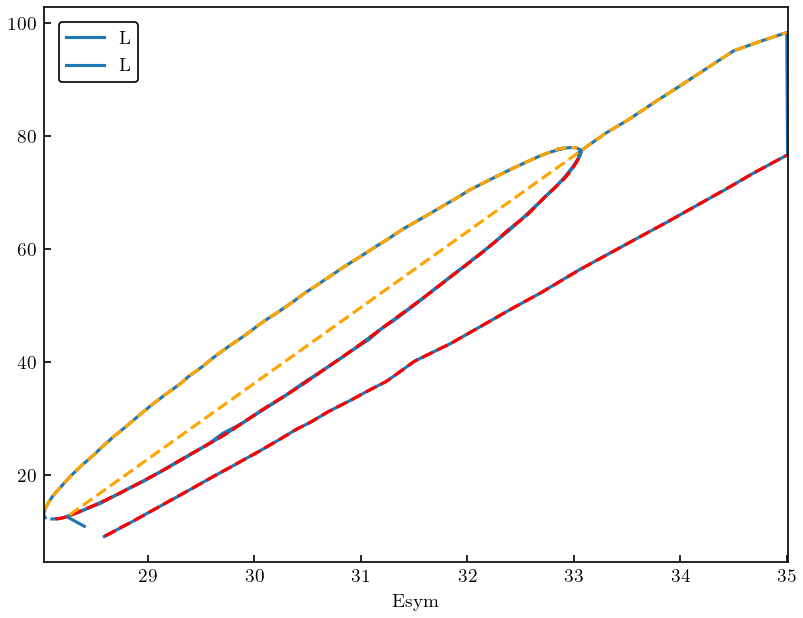

In [3]:
fig, ax = plt.subplots()
data_masses.plot('Esym', 'L', ax=ax, c='C0')
data_IAS.plot('Esym', 'L', ax=ax, c='C0')

ax.plot(Esym, spline_data_masses_upper(Esym), ls='--', c='orange')
ax.plot(Esym, spline_data_masses_lower(Esym), ls='--', c='red')


ax.plot(Esym, spline_data_IAS_upper(Esym), ls='--', c='orange')
ax.plot(Esym, spline_data_IAS_lower(Esym), ls='--', c='red');

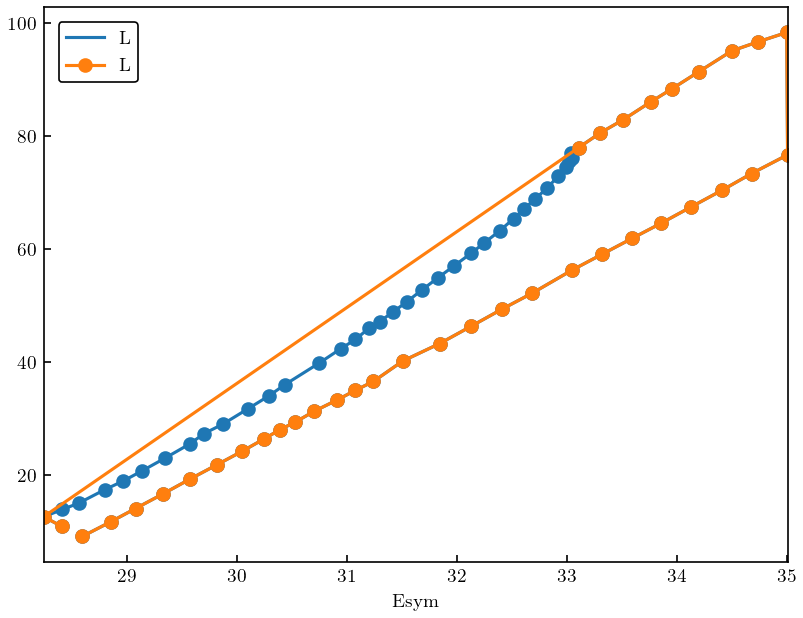

In [4]:
fig, ax = plt.subplots()

data_IAS.plot('Esym', 'L', ax=ax, marker='o')
data_IAS2.plot('Esym', 'L', ax=ax, marker='o')

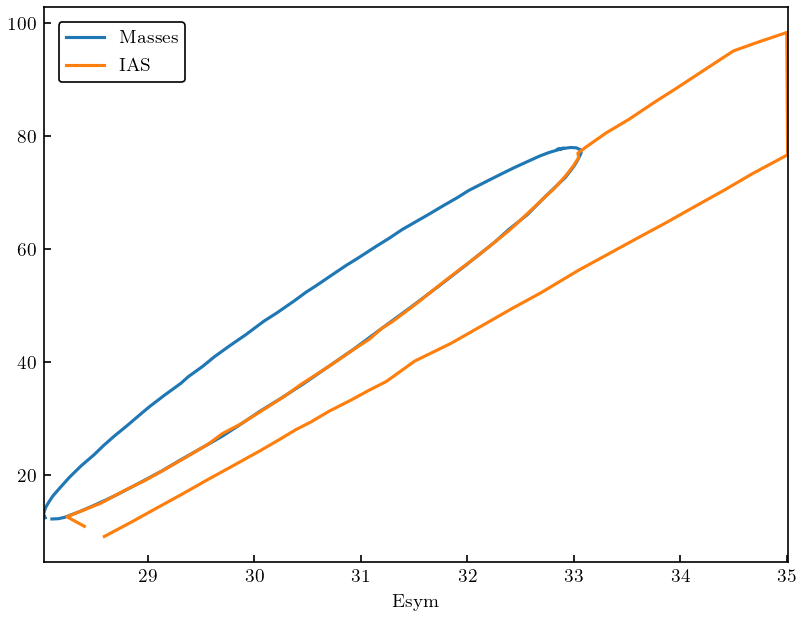

In [5]:
fig, ax = plt.subplots()

data_masses.plot('Esym', 'L', ax=ax, label='Masses')
data_IAS.plot('Esym', 'L', ax=ax, label='IAS')

In [6]:
# def getInterp(kind, upperLower, Esym):
#     functionName= "spline_{kind}_{upperLower}".format(kind=kind, upperLower=upperLower)
#     return eval(functionName)(Esym)

In [7]:
def find_agreement(Esym, labels, sources):
    lower_bound = - np.inf * np.ones(Esym.shape)
    upper_bound = + np.inf * np.ones(Esym.shape)
    for source in sources:
        if source['label'] in labels:
            if 'spline_lower' in source and 'spline_upper' in source:
                lower = source['spline_lower'](Esym)
                upper = source['spline_upper'](Esym)
                
#                 lower = np.where(np.isnan(lower), +np.inf, lower)
#                 upper = np.where(np.isnan(upper), -np.inf, upper)
                lower[np.isnan(lower)] = +np.inf
                upper[np.isnan(upper)] = -np.inf
            else:
                raise ValueError()
            
            lower_bound = np.where(lower > lower_bound, lower, lower_bound)
            upper_bound = np.where(upper < upper_bound, upper, upper_bound)
    return lower_bound, upper_bound

In [8]:
expt_lower, expt_upper = find_agreement(Esym, ['HIC', "Sn Neutron Skin", "GDR", "Pb", 'Masses', 'IAS'], avail_srcs)
expt_mask = expt_lower < expt_upper

In [9]:
# regularLineStyle = {"ls": "--", "lw" : 0.8}

# def plotSource(ax, kind, color, Esym):
#     if kind in ["H", "G", "masses", "IAS"]:
#         data = "data_" + kind
#         plt.fill(eval(data)["Esym"], eval(data)["L"], facecolor=color, edgecolor='k', **regularLineStyle)
#     else:
#         plt.fill_between(
#             Esym, getInterp(kind, "lower", Esym), getInterp(kind, "upper", Esym),
#             facecolor=color, edgecolor='k', **regularLineStyle
#         )

def plot_source(
    ax, Esym, L=None, spline_lower=None, spline_upper=None, use_spline=True,
    label=None, label_x=0, label_y=0, ha=None, va=None,
    label_color='k', rotation=None, bbox=None,
    facecolor=None, edgecolor='k', ls='-', lw=0.8, hatch=None,
    zorder=None, **kwargs
):
    if not use_spline:
        ax.fill(
            Esym, L, edgecolor=edgecolor, ls=ls, lw=lw, facecolor=facecolor,
            hatch=hatch, zorder=zorder, **kwargs
        )
    else:
        old_facecolor = facecolor
        if hatch is not None:
            facecolor = "none"
        ax.plot(Esym, spline_lower(Esym), c=edgecolor, ls=ls, lw=lw, zorder=zorder)
        ax.plot(Esym, spline_upper(Esym), c=edgecolor, ls=ls, lw=lw, zorder=zorder)
        ax.fill_between(
            Esym, spline_lower(Esym), spline_upper(Esym),
            edgecolor=old_facecolor, ls=ls, lw=0, facecolor=facecolor,
            hatch=hatch, zorder=zorder, **kwargs
        )

    if label is not None:
        if bbox is True:
            bbox = dict(facecolor='w', boxstyle='round', alpha=1)
        ax.text(
            label_x, label_y, label, fontdict=dict(color=label_color),
            rotation=rotation, transform=ax.transAxes, bbox=bbox)
    return ax

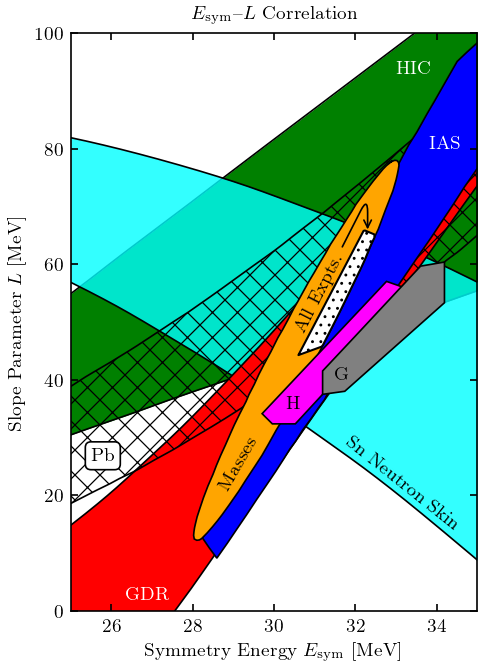

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 5))

# set labels and title
ax.set_xlabel(r"Symmetry Energy $E_\mathrm{sym}$ [MeV]")
ax.set_ylabel(r"Slope Parameter $L$ [MeV]")
ax.set_title('$E_\mathrm{sym}$--$L$ Correlation')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# set limits
ax.set_xlim(25, 35)
ax.set_ylim(0, 100)

# plot each source separately
for i, src in enumerate(avail_srcs):
    plot_source(ax, zorder=i/10., **src)
    
# Plot all experimental constraints
ax.fill_between(
    Esym[expt_mask], expt_lower[expt_mask], expt_upper[expt_mask],
    lw=1, facecolor='w', edgecolor='k', hatch='...'
)
ax.annotate(
    'All Expts.', xy=(0.73, 0.66), xytext=(0.61, 0.55), xycoords=ax.transAxes, textcoords=ax.transAxes,
    rotation=63, ha='center', va='center',
    arrowprops = dict(arrowstyle = "->", connectionstyle=f"angle,angleA={63-180},angleB=-90,rad=15", shrinkA=0, shrinkB=0)
)

fig.savefig("Lattimer_Esym_L.pdf")